In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import rbf
import utils

## 1-Batch mode training using least squares - supervised learning of network weights

In [2]:
# Create the input space and corresponding training sets
interval_start, interval_end = 0, 2 * np.pi
step_size = 0.1

X_train = np.arange(interval_start, interval_end, step_size)
y1_train = np.sin(2 * X_train)
y2_train = np.where(np.sin(2 * X_train) >= 0, 1, -1)

# Create the testing sets
test_interval_start = interval_start + 0.05
X_test = np.arange(test_interval_start, interval_end, step_size)
y1_test = np.sin(2 * X_test )
y2_test = np.where(np.sin(2 * X_test) >= 0, 1, -1)



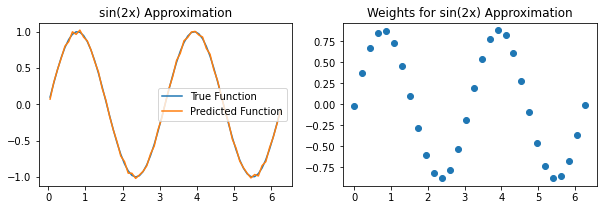

In [3]:
# Number of RBF nodes 
n = 30
# Place RBF nodes evenly spaced in the input space
centers = np.linspace(interval_start, interval_end, n)
# Set a common variance for all nodes
variance = 0.1

network = rbf.RBFNetwork(centers[:, np.newaxis], variance)
network.batch_least_squares(X_train[:, np.newaxis], y1_train[:, np.newaxis])
y1_pred = network.make_prediction(X_test[:, np.newaxis])
network.plot_prediction(X_test, y1_test, y1_pred, title="sin(2x)")

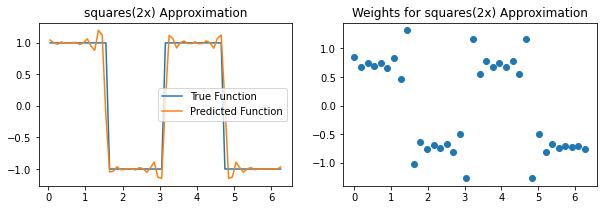

In [4]:
# Number of RBF nodes 
n = 36
# Place RBF nodes evenly spaced in the input space
centers = np.linspace(interval_start, interval_end, n)
# Set a common variance for all nodes
variance = 0.1

network = rbf.RBFNetwork(centers[:, np.newaxis], variance)
network.batch_least_squares(X_train[:, np.newaxis], y2_train[:, np.newaxis])
y2_pred = network.make_prediction(X_test[:, np.newaxis])
network.plot_prediction(X_test, y2_test, y2_pred, title="squares(2x)")

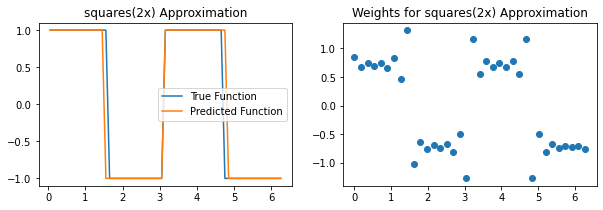

In [5]:
# How can you simply transform the output of your RBF network to reduce the residual error to 0 for the square(2x) problem

# Number of RBF nodes 
n = 36
# Place RBF nodes evenly spaced in the input space
centers = np.linspace(interval_start, interval_end, n)
# Set a common variance for all nodes
variance = 0.1

network = rbf.RBFNetwork(centers[:, np.newaxis], variance)
network.batch_least_squares(X_train[:, np.newaxis], y2_train[:, np.newaxis])
y2_pred = network.make_prediction(X_test[:, np.newaxis])
y2_pred = utils.threshold_function(y2_pred, threshold=0)
network.plot_prediction(X_test, y2_test, y2_pred, title="squares(2x)")

Num RBF Units: 5, Error1: 0.6335172214839497, Error2: 0.9647729440820156
Num RBF Units: 10, Error1: 0.4115298777349028, Error2: 0.6318926602904464
Num RBF Units: 15, Error1: 0.27894442531280594, Error2: 0.46110052570969995
Num RBF Units: 20, Error1: 0.1509718669284176, Error2: 0.25929809087453426
Num RBF Units: 25, Error1: 0.05894319754359946, Error2: 0.1909180933035525
Num RBF Units: 30, Error1: 0.01737432502581867, Error2: 0.1047376649291765
Num RBF Units: 35, Error1: 0.004566716621616419, Error2: 0.08953264568707932
Num RBF Units: 40, Error1: 0.0014137706799768129, Error2: 0.09320584589677285
Num RBF Units: 45, Error1: 0.0009755430399576682, Error2: 0.09596182248320069
Num RBF Units: 50, Error1: 0.0008208607461986251, Error2: 0.0968527674284165
Num RBF Units: 55, Error1: 0.0007436321519040661, Error2: 0.09461918062535417
Num RBF Units: 60, Error1: 0.0006757086710010549, Error2: 0.11863672927517295


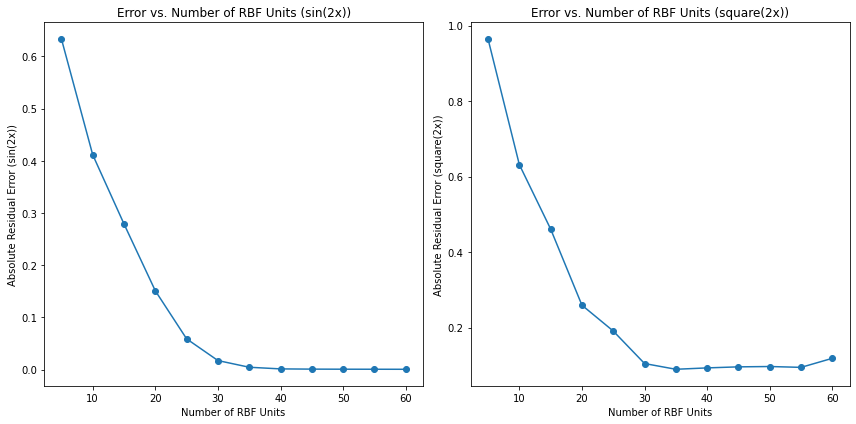

In [6]:
# Vary the number of RBF units
num_rbf_units_range = [k for k in range(5, 65, 5)] 

# Dictionary to store results
results = {'num_rbf_units': [], 'error1': [], 'error2': []}
# Set a common variance for all nodes
variance = 0.1

for num_rbf_units in num_rbf_units_range:
    # Place RBF nodes evenly spaced in the input space
    centers = np.linspace(interval_start, interval_end, num_rbf_units)

    network1 = rbf.RBFNetwork(centers[:, np.newaxis], variance)
    network1.batch_least_squares(X_train[:, np.newaxis], y1_train[:, np.newaxis])
    y1_pred = network1.make_prediction(X_test[:, np.newaxis])
    # Calculate absolute residual errors
    error1 = network.absolute_residual_error(y1_test[:, np.newaxis], y1_pred)

    network2 = rbf.RBFNetwork(centers[:, np.newaxis], variance)
    network2.batch_least_squares(X_train[:, np.newaxis], y2_train[:, np.newaxis])
    y2_pred = network2.make_prediction(X_test[:, np.newaxis])
    # Calculate absolute residual errors
    error2 = network.absolute_residual_error(y2_test[:, np.newaxis], y2_pred)


    # Store results
    results['num_rbf_units'].append(num_rbf_units)
    results['error1'].append(error1)
    results['error2'].append(error2)

# Print and plot the results 
for i in range(len(num_rbf_units_range)):
    print(f"Num RBF Units: {results['num_rbf_units'][i]}, Error1: {results['error1'][i]}, Error2: {results['error2'][i]}")

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(results['num_rbf_units'], results['error1'], marker='o')
plt.xlabel('Number of RBF Units')
plt.ylabel('Absolute Residual Error (sin(2x))')
plt.title('Error vs. Number of RBF Units (sin(2x))')

plt.subplot(1, 2, 2)
plt.plot(results['num_rbf_units'], results['error2'], marker='o')
plt.xlabel('Number of RBF Units')
plt.ylabel('Absolute Residual Error (square(2x))')
plt.title('Error vs. Number of RBF Units (square(2x))')

plt.tight_layout()
plt.show()

## 2-Regression with noise

In [7]:
# Create the input space and corresponding training sets
interval_start, interval_end = 0, 2 * np.pi
step_size = 0.1
variance_noise = 0.1

X_train = np.arange(interval_start, interval_end, step_size)
y1_train = np.sin(2 * X_train)
y2_train = np.where(np.sin(2 * X_train) >= 0, 1, -1)
# adding noise
y1_train = utils.add_noise(y1_train, variance=variance_noise)
y2_train = utils.add_noise(y2_train, variance=variance_noise)

# Create the testing sets
test_interval_start = interval_start + 0.05
X_test = np.arange(test_interval_start, interval_end, step_size)
y1_test = np.sin(2 * X_test )
y2_test = np.where(np.sin(2 * X_test) >= 0, 1, -1)
# adding noise
y1_test = utils.add_noise(y1_test, variance=variance_noise)
y2_test = utils.add_noise(y2_test, variance=variance_noise)


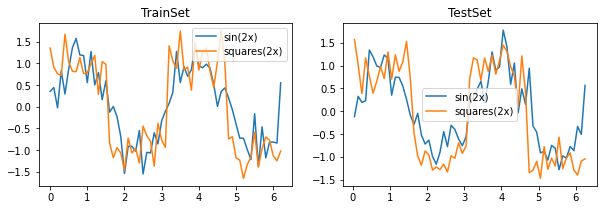

In [8]:
plt.figure(figsize=(10, 3))

plt.subplot(1, 2, 1)
plt.plot(X_train, y1_train, label='sin(2x)')
plt.plot(X_train, y2_train, label='squares(2x)',)
plt.legend()
plt.title('TrainSet')

plt.subplot(1, 2, 2)
plt.plot(X_test, y1_test, label='sin(2x)')
plt.plot(X_test, y2_test, label='squares(2x)',)
plt.legend()
plt.title('TestSet')

plt.show()

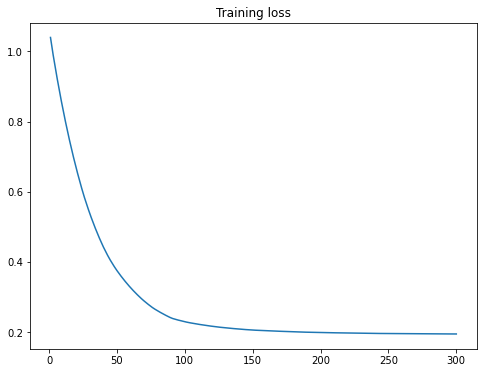

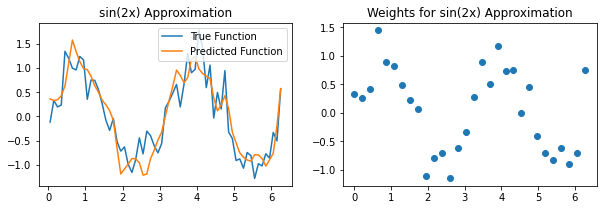

In [9]:
# Number of RBF nodes 
n = 30
# Place RBF nodes evenly spaced in the input space
centers = np.linspace(interval_start, interval_end, n)
# Set a common variance for all nodes
variance = 0.1

network = rbf.RBFNetwork(centers[:, np.newaxis], variance)
network.delta_rule(X_train[:, np.newaxis], y1_train[:, np.newaxis], epochs=300, lr=0.01, plot=True)
y1_pred = network.make_prediction(X_test[:, np.newaxis])
network.plot_prediction(X_test, y1_test, y1_pred, title="sin(2x)")

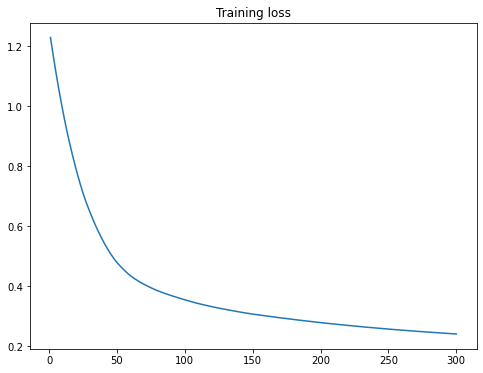

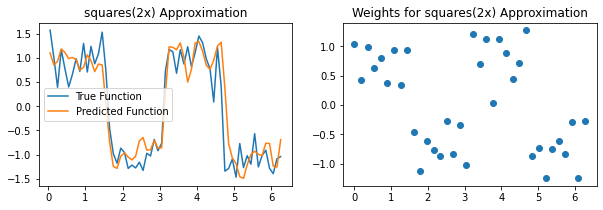

In [10]:
# Number of RBF nodes 
n = 36
# Place RBF nodes evenly spaced in the input space
centers = np.linspace(interval_start, interval_end, n)
# Set a common variance for all nodes
variance = 0.1

network = rbf.RBFNetwork(centers[:, np.newaxis], variance)
network.delta_rule(X_train[:, np.newaxis], y2_train[:, np.newaxis], epochs=300, lr=0.01, plot=True)
y2_pred = network.make_prediction(X_test[:, np.newaxis])
network.plot_prediction(X_test, y2_test, y2_pred, title="squares(2x)")

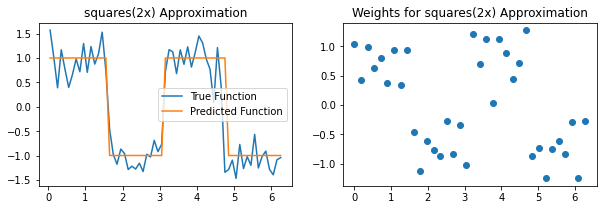

In [11]:
y2_pred = utils.threshold_function(y2_pred, threshold=0)
network.plot_prediction(X_test, y2_test, y2_pred, title="squares(2x)")

In [12]:
# Vary the number of RBF units and widths
num_rbf_units_range = [15, 20, 25, 30, 35]
variance_range = [0.1, 0.2, 0.3, 0.4, 0.5]

# Dictionary to store results
results_batch_learning = {'num_rbf_units': [], 'variance': [], 'error1': [], 'error2': []}
results_online_learning = {'num_rbf_units': [], 'variance': [], 'error1': [], 'error2': []}

for num_rbf_units in num_rbf_units_range:
    for variance in variance_range:

        network1 = rbf.RBFNetwork(centers[:, np.newaxis], variance)
        network1.delta_rule(X_train[:, np.newaxis], y1_train[:, np.newaxis], epochs=300, lr=0.01)
        y1_pred = network1.make_prediction(X_test[:, np.newaxis])
        # Calculate absolute residual errors
        error1 = network.absolute_residual_error(y1_test[:, np.newaxis], y1_pred)

        network2 = rbf.RBFNetwork(centers[:, np.newaxis], variance)
        network2.delta_rule(X_train[:, np.newaxis], y2_train[:, np.newaxis], epochs=300, lr=0.01)
        y2_pred = network2.make_prediction(X_test[:, np.newaxis])
        # Calculate absolute residual errors
        error2 = network.absolute_residual_error(y2_test[:, np.newaxis], y2_pred)

        # Store results for batch learning
        results_batch_learning['num_rbf_units'].append(num_rbf_units)
        results_batch_learning['variance'].append(variance)
        results_batch_learning['error1'].append(error1)
        results_batch_learning['error2'].append(error2)

        network1 = rbf.RBFNetwork(centers[:, np.newaxis], variance)
        network1.delta_rule(X_train[:, np.newaxis], y1_train[:, np.newaxis], epochs=300, lr=0.01)
        y1_pred = network1.make_prediction(X_test[:, np.newaxis])
        # Calculate absolute residual errors
        error1_online = network.absolute_residual_error(y1_test[:, np.newaxis], y1_pred)

        network2 = rbf.RBFNetwork(centers[:, np.newaxis], variance)
        network2.delta_rule(X_train[:, np.newaxis], y2_train[:, np.newaxis], epochs=300, lr=0.01)
        y2_pred = network2.make_prediction(X_test[:, np.newaxis])
        # Calculate absolute residual errors
        error2_online = network.absolute_residual_error(y2_test[:, np.newaxis], y2_pred)

        
        # Store results for online learning
        results_online_learning['num_rbf_units'].append(num_rbf_units)
        results_online_learning['variance'].append(variance)
        results_online_learning['error1'].append(error1_online)
        results_online_learning['error2'].append(error2_online)

Results for Batch Learning:
Num RBF Units: 15, Varianve: 0.1, Error1: 0.2950857894818158, Error2: 0.30833440051751576
Num RBF Units: 15, Varianve: 0.2, Error1: 0.27234870116069504, Error2: 0.3159497770642791
Num RBF Units: 15, Varianve: 0.3, Error1: 0.2640687021638198, Error2: 0.3402534525574099
Num RBF Units: 15, Varianve: 0.4, Error1: 0.25562933270771543, Error2: 0.32137796655115564
Num RBF Units: 15, Varianve: 0.5, Error1: 0.26367425960726076, Error2: 0.3447975834928082
Num RBF Units: 20, Varianve: 0.1, Error1: 0.2997612649406664, Error2: 0.3269989917348996
Num RBF Units: 20, Varianve: 0.2, Error1: 0.27915461404179115, Error2: 0.30931591748049964
Num RBF Units: 20, Varianve: 0.3, Error1: 0.25048939344781357, Error2: 0.3418333802913539
Num RBF Units: 20, Varianve: 0.4, Error1: 0.2710589045092902, Error2: 0.3285760746381773
Num RBF Units: 20, Varianve: 0.5, Error1: 0.2593090092845863, Error2: 0.3419239501264819
Num RBF Units: 25, Varianve: 0.1, Error1: 0.2849853757522132, Error2: 0.29

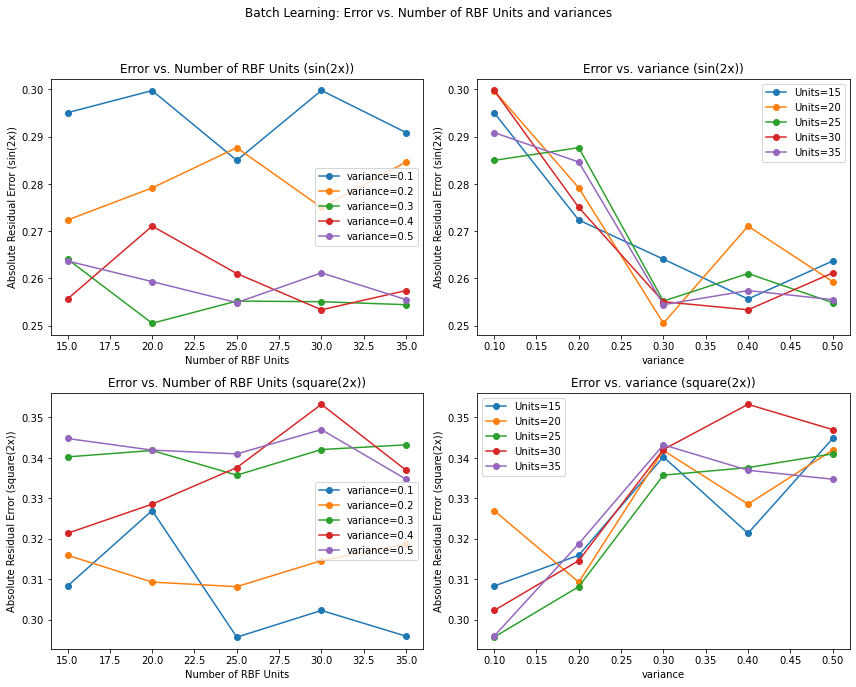

In [13]:
# Print and plot the results for batch learning
print("Results for Batch Learning:")
for i in range(len(results_batch_learning['num_rbf_units'])):
    print(f"Num RBF Units: {results_batch_learning['num_rbf_units'][i]}, Varianve: {results_batch_learning['variance'][i]}, "
          f"Error1: {results_batch_learning['error1'][i]}, Error2: {results_batch_learning['error2'][i]}")

# Plot the results for batch learning
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
fig.suptitle('Batch Learning: Error vs. Number of RBF Units and variances')

for i, function_name in enumerate(['sin(2x)', 'square(2x)']):
    ax = axes[i, 0]
    ax.set_title(f'Error vs. Number of RBF Units ({function_name})')
    for variance in variance_range:
        condition = np.array([results_batch_learning['variance'][j] == variance for j in range(len(results_batch_learning['variance']))])
        ax.plot(np.array(results_batch_learning['num_rbf_units'])[condition], np.array(results_batch_learning[f'error{i + 1}'])[condition],
                marker='o', label=f'variance={variance}')
    ax.set_xlabel('Number of RBF Units')
    ax.set_ylabel(f'Absolute Residual Error ({function_name})')
    ax.legend()

    ax = axes[i, 1]
    ax.set_title(f'Error vs. variance ({function_name})')
    for num_rbf_units in num_rbf_units_range:
        condition = np.array([results_batch_learning['num_rbf_units'][j] == num_rbf_units for j in range(len(results_batch_learning['num_rbf_units']))])
        ax.plot(np.array(results_batch_learning['variance'])[condition], np.array(results_batch_learning[f'error{i + 1}'])[condition],
                marker='o', label=f'Units={num_rbf_units}')
    ax.set_xlabel('variance')
    ax.set_ylabel(f'Absolute Residual Error ({function_name})')
    ax.legend()

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Results for Online Learning:
Num RBF Units: 15, Variance: 0.1, Error1: 0.29938332770161125, Error2: 0.30684981409303774
Num RBF Units: 15, Variance: 0.2, Error1: 0.27130109493321136, Error2: 0.3144264994317107
Num RBF Units: 15, Variance: 0.3, Error1: 0.25575187838793345, Error2: 0.33061421051786655
Num RBF Units: 15, Variance: 0.4, Error1: 0.26477774966369066, Error2: 0.32204659473956504
Num RBF Units: 15, Variance: 0.5, Error1: 0.2599117618217377, Error2: 0.3669270365482036
Num RBF Units: 20, Variance: 0.1, Error1: 0.2967546322325017, Error2: 0.2952547882228343
Num RBF Units: 20, Variance: 0.2, Error1: 0.2645388372700703, Error2: 0.32011315957308
Num RBF Units: 20, Variance: 0.3, Error1: 0.2680170390207843, Error2: 0.35114832609656244
Num RBF Units: 20, Variance: 0.4, Error1: 0.2549872326878775, Error2: 0.3549598531205628
Num RBF Units: 20, Variance: 0.5, Error1: 0.2557107357860873, Error2: 0.35027906032012984
Num RBF Units: 25, Variance: 0.1, Error1: 0.32499821521101485, Error2: 0.2

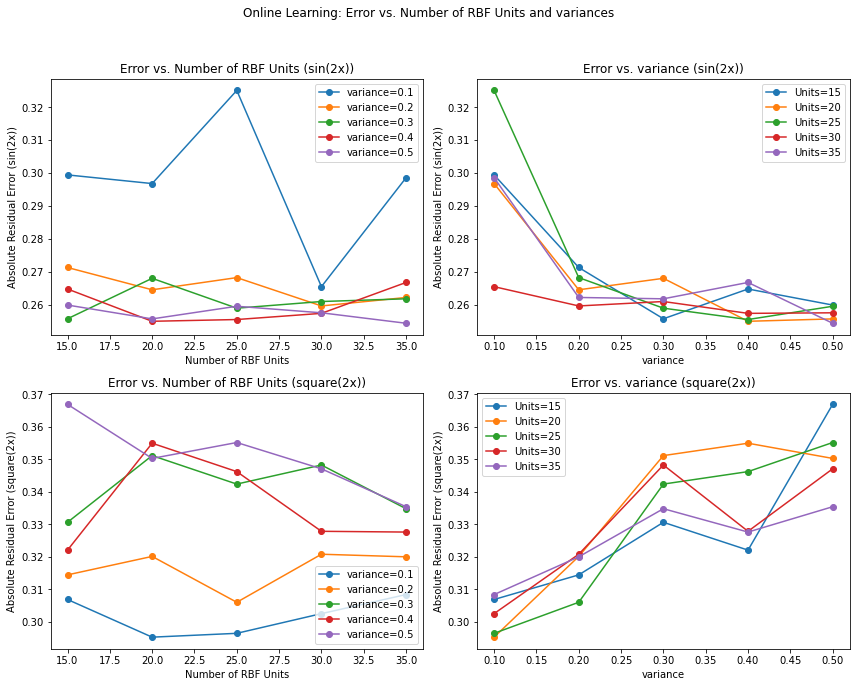

In [14]:
# Print and plot the results for online learning
print("Results for Online Learning:")
for i in range(len(results_online_learning['num_rbf_units'])):
    print(f"Num RBF Units: {results_online_learning['num_rbf_units'][i]}, Variance: {results_online_learning['variance'][i]}, "
          f"Error1: {results_online_learning['error1'][i]}, Error2: {results_online_learning['error2'][i]}")

# Plot the results for online learning
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
fig.suptitle('Online Learning: Error vs. Number of RBF Units and variances')

for i, function_name in enumerate(['sin(2x)', 'square(2x)']):
    ax = axes[i, 0]
    ax.set_title(f'Error vs. Number of RBF Units ({function_name})')
    for variance in variance_range:
        condition = np.array([results_online_learning['variance'][j] == variance for j in range(len(results_online_learning['variance']))])
        ax.plot(np.array(results_online_learning['num_rbf_units'])[condition], np.array(results_online_learning[f'error{i + 1}'])[condition],
                marker='o', label=f'variance={variance}')
    ax.set_xlabel('Number of RBF Units')
    ax.set_ylabel(f'Absolute Residual Error ({function_name})')
    ax.legend()

    ax = axes[i, 1]
    ax.set_title(f'Error vs. variance ({function_name})')
    for num_rbf_units in num_rbf_units_range:
        condition = np.array([results_online_learning['num_rbf_units'][j] == num_rbf_units for j in range(len(results_online_learning['num_rbf_units']))])
        ax.plot(np.array(results_online_learning['variance'])[condition], np.array(results_online_learning[f'error{i + 1}'])[condition],
                marker='o', label=f'Units={num_rbf_units}')
    ax.set_xlabel('variance')
    ax.set_ylabel(f'Absolute Residual Error ({function_name})')
    ax.legend()

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [15]:
# TODO : compare your optimal RBF network trained in batch mode with a single-hidden-layer perceptron trained with backprop


## 3-Competitive learning (CL) to initialise RBF units

In [16]:
# Create the input space and corresponding training sets
interval_start, interval_end = 0, 2 * np.pi
step_size = 0.1
variance_noise = 0.1

X_train = np.arange(interval_start, interval_end, step_size)
y1_train = np.sin(2 * X_train)
y2_train = np.where(np.sin(2 * X_train) >= 0, 1, -1)
# adding noise
y1_train = utils.add_noise(y1_train, variance=variance_noise)
y2_train = utils.add_noise(y2_train, variance=variance_noise)

# Create the testing sets
test_interval_start = interval_start + 0.05
X_test = np.arange(test_interval_start, interval_end, step_size)
y1_test = np.sin(2 * X_test )
y2_test = np.where(np.sin(2 * X_test) >= 0, 1, -1)
# adding noise
y1_test = utils.add_noise(y1_test, variance=variance_noise)
y2_test = utils.add_noise(y2_test, variance=variance_noise)


In [17]:
# Define parameters
num_rbf_units_cl = 36  # Number of RBF units for CL-based initialization
learning_rate_cl = 0.5
epochs_cl = 300
width = 0.25
# Competitive Learning for RBF initialization
rbf_nodes_cl =  utils.competitive_learning(X_train, num_rbf_units_cl, learning_rate_cl, epochs_cl, num_winners=2)

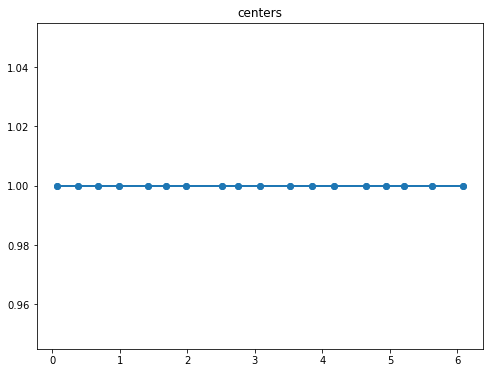

In [18]:
plt.figure(figsize=(8, 6))
plt.plot(rbf_nodes_cl, [1 for _ in range(num_rbf_units_cl)],marker="o")
plt.title("centers")
plt.show()

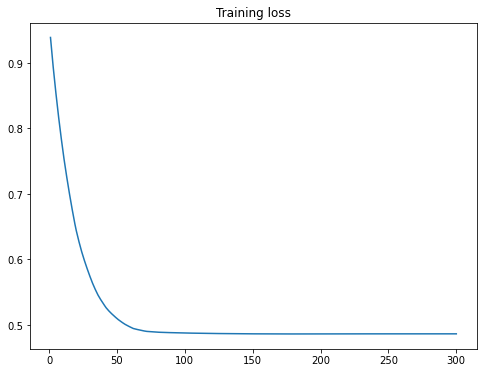

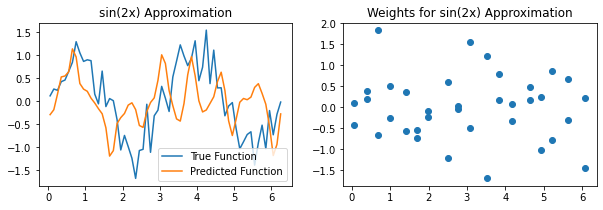

In [19]:
network = rbf.RBFNetwork(rbf_nodes_cl, variance=0.1)
network.delta_rule(X_train[:, np.newaxis], y1_train[:, np.newaxis], epochs=300, lr=0.01, plot=True)
y1_pred = network.make_prediction(X_test[:, np.newaxis])
network.plot_prediction(X_test, y1_test, y1_pred, title="sin(2x)")

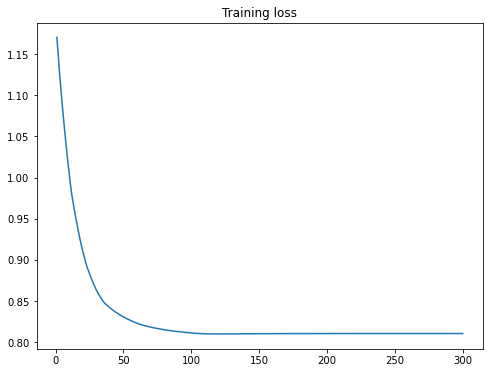

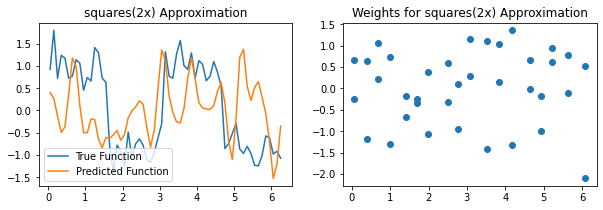

In [20]:
network = rbf.RBFNetwork(rbf_nodes_cl, variance=0.1)
network.delta_rule(X_train[:, np.newaxis], y2_train[:, np.newaxis], epochs=300, lr=0.01, plot=True)
y2_pred = network.make_prediction(X_test[:, np.newaxis])
network.plot_prediction(X_test, y2_test, y2_pred, title="squares(2x)")

In [21]:
# Create the input space and corresponding training sets
interval_start, interval_end = 0, 2 * np.pi
step_size = 0.1

X_train = np.arange(interval_start, interval_end, step_size)
y1_train = np.sin(2 * X_train)
y2_train = np.where(np.sin(2 * X_train) >= 0, 1, -1)

# Create the testing sets
test_interval_start = interval_start + 0.05
X_test = np.arange(test_interval_start, interval_end, step_size)
y1_test = np.sin(2 * X_test )
y2_test = np.where(np.sin(2 * X_test) >= 0, 1, -1)

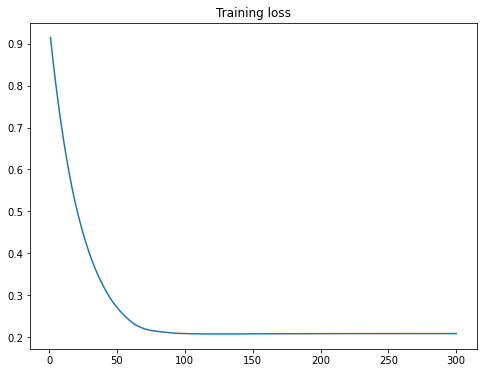

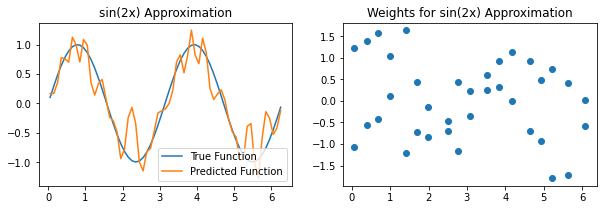

In [22]:
network = rbf.RBFNetwork(rbf_nodes_cl, variance=0.1)
network.delta_rule(X_train[:, np.newaxis], y1_train[:, np.newaxis], epochs=300, lr=0.01, plot=True)
y1_pred = network.make_prediction(X_test[:, np.newaxis])
network.plot_prediction(X_test, y1_test, y1_pred, title="sin(2x)")

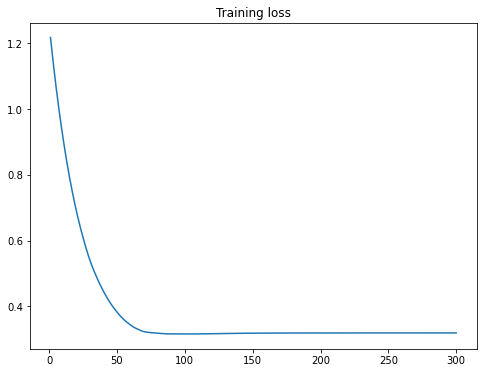

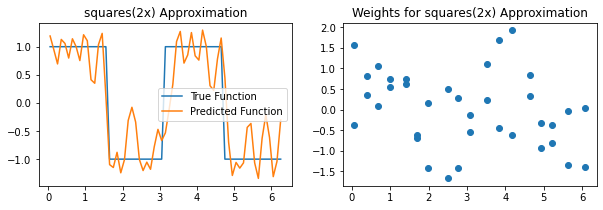

In [23]:
network = rbf.RBFNetwork(rbf_nodes_cl, variance=0.1)
network.delta_rule(X_train[:, np.newaxis], y2_train[:, np.newaxis], epochs=300, lr=0.01, plot=True)
y2_pred = network.make_prediction(X_test[:, np.newaxis])
network.plot_prediction(X_test, y2_test, y2_pred, title="squares(2x)")

In [24]:
# Replace 'your_zip_file.zip' with the actual path to your zip file
zip_file_path = '../DATA/data_lab2.zip'

# Replace 'desired_extraction_folder' with the desired extraction folder path
extract_folder = 'data'

# Call the function to extract the zip file
utils.extract_zip(zip_file_path, extract_folder)

Zip file '../DATA/data_lab2.zip' successfully extracted to 'data'.


In [25]:
file_path = './data/ballist.dat'
data_train = utils.extract_data_to_numpy(file_path)
X_train = data_train[:, :2]
y_train = data_train[:, 2:]
print(data_train.shape)
print(X_train.shape)
print(y_train.shape)

(100, 4)
(100, 2)
(100, 2)


In [26]:
file_path = './data/balltest.dat'
data_test = utils.extract_data_to_numpy(file_path)
X_test = data_test[:, :2]
y_test = data_test[:, 2:]
print(data_test.shape)
print(X_test.shape)
print(y_test.shape)

(100, 4)
(100, 2)
(100, 2)


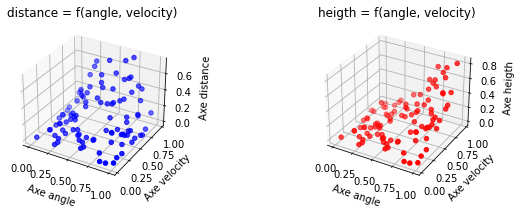

In [27]:
# 3D plotting 
fig = plt.figure(figsize=(10, 3))
ax = fig.add_subplot(121, projection='3d')
ax.scatter(X_train[:,0], X_train[:,1], y_train[:,0], c='blue', marker='o')
# add axes
ax.set_xlabel('Axe angle')
ax.set_ylabel('Axe velocity')
ax.set_zlabel('Axe distance')
plt.title('distance = f(angle, velocity)')

ax = fig.add_subplot(122, projection='3d')
ax.scatter(X_train[:,0], X_train[:,1], y_train[:,1], c='red', marker='o')
# add axes
ax.set_xlabel('Axe angle')
ax.set_ylabel('Axe velocity')
ax.set_zlabel('Axe heigth')
plt.title('heigth = f(angle, velocity)')


plt.show()

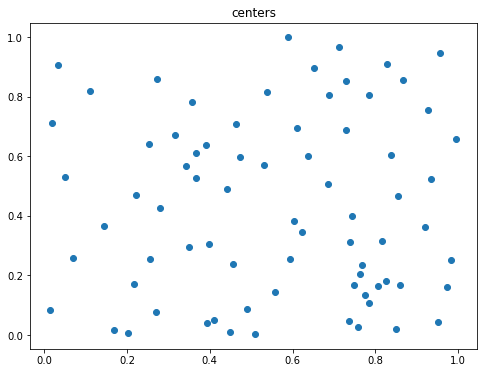

In [28]:
# Define parameters
num_rbf_units_cl =75  # Number of RBF units for CL-based initialization
learning_rate_cl = 0.25
epochs_cl = 300
width = 0.5
# Competitive Learning for RBF initialization
rbf_nodes_cl =  utils.competitive_learning(X_train, num_rbf_units_cl, learning_rate_cl, epochs_cl, num_winners=1)

plt.figure(figsize=(8, 6))
plt.scatter(rbf_nodes_cl[:,0], rbf_nodes_cl[:,1],marker="o")
plt.title("centers")
plt.show()

In [29]:
network = rbf.RBFNetwork(rbf_nodes_cl, variance=0.1)
network.batch_least_squares(X_train, y_train)
y_pred = network.make_prediction(X_test)

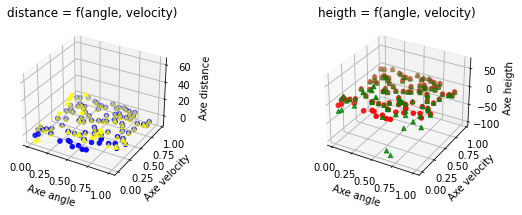

In [30]:
# 3D plotting 
fig = plt.figure(figsize=(10, 3))
ax = fig.add_subplot(121, projection='3d')
ax.scatter(X_test[:,0], X_test[:,1], y_test[:,0], c='blue', marker='o')
ax.scatter(X_test[:,0], X_test[:,1], y_pred[:,0], c='yellow', marker='^')
# add axes
ax.set_xlabel('Axe angle')
ax.set_ylabel('Axe velocity')
ax.set_zlabel('Axe distance')
plt.title('distance = f(angle, velocity)')

ax = fig.add_subplot(122, projection='3d')
ax.scatter(X_test[:,0], X_test[:,1], y_test[:,1], c='red', marker='o')
ax.scatter(X_test[:,0], X_test[:,1], y_pred[:,1], c='green', marker='^')
# add axes
ax.set_xlabel('Axe angle')
ax.set_ylabel('Axe velocity')
ax.set_zlabel('Axe heigth')
plt.title('heigth = f(angle, velocity)')


plt.show()

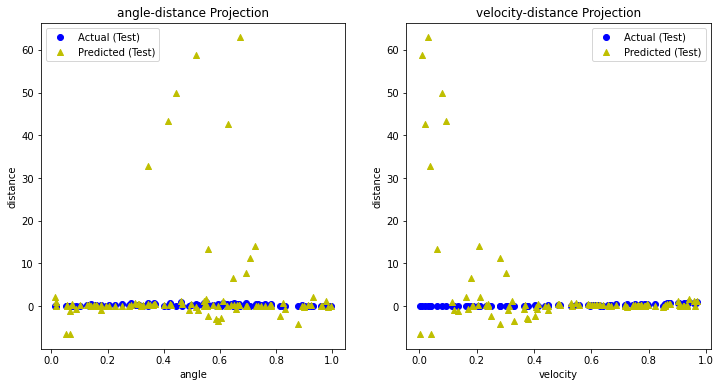

In [31]:
#Plot the projections
fig_projections = plt.figure(figsize=(12, 6))

# XZ Projection
ax_xz = fig_projections.add_subplot(121)
ax_xz.scatter(X_test[:, 0], y_test[:,0], c='b', marker='o', label='Actual (Test)')
ax_xz.scatter(X_test[:, 0], y_pred[:,0], c='y', marker='^', label='Predicted (Test)')
ax_xz.set_xlabel('angle')
ax_xz.set_ylabel('distance')
ax_xz.set_title('angle-distance Projection')
ax_xz.legend()

# YZ Projection
ax_yz = fig_projections.add_subplot(122)
ax_yz.scatter(X_test[:, 1], y_test[:,0], c='b', marker='o', label='Actual (Test)')
ax_yz.scatter(X_test[:, 1], y_pred[:,0], c='y', marker='^', label='Predicted (Test)')
ax_yz.set_xlabel('velocity')
ax_yz.set_ylabel('distance')
ax_yz.set_title('velocity-distance Projection')
ax_yz.legend()

plt.show()

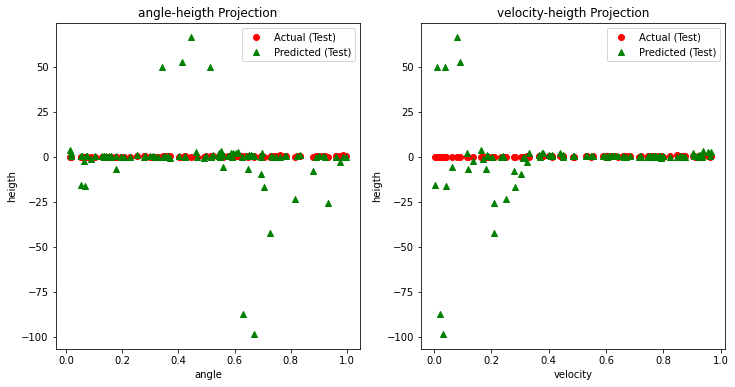

In [32]:
#Plot the projections
fig_projections = plt.figure(figsize=(12, 6))

# XZ Projection
ax_xz = fig_projections.add_subplot(121)
ax_xz.scatter(X_test[:, 0], y_test[:,1], c='r', marker='o', label='Actual (Test)')
ax_xz.scatter(X_test[:, 0], y_pred[:,1], c='g', marker='^', label='Predicted (Test)')
ax_xz.set_xlabel('angle')
ax_xz.set_ylabel('heigth')
ax_xz.set_title('angle-heigth Projection')
ax_xz.legend()

# YZ Projection
ax_yz = fig_projections.add_subplot(122)
ax_yz.scatter(X_test[:, 1], y_test[:,1], c='r', marker='o', label='Actual (Test)')
ax_yz.scatter(X_test[:, 1], y_pred[:,1], c='g', marker='^', label='Predicted (Test)')
ax_yz.set_xlabel('velocity')
ax_yz.set_ylabel('heigth')
ax_yz.set_title('velocity-heigth Projection')
ax_yz.legend()

plt.show()

## 4-Topological Ordering of Animal Species

In [33]:
import numpy as np 
from som import SelfOrganizingMap
from utils import load_binary_sequence_to_matrix
import matplotlib.pyplot as plt
from collections import defaultdict
from matplotlib.patches import Rectangle
from collections import Counter

In [19]:
dataset = load_binary_sequence_to_matrix(file="./data/animals.dat", rows=32, cols=84)
dataset[0]

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0])

In [27]:
input_size = 84
map_size = (1, 100)  

som = SelfOrganizingMap(input_size, map_size)
som.train(dataset, max_iterations=30)  

In [28]:
weights = som.get_weights()
height, width, _ = weights.shape
animal_names = [
    'antelope', 'ape', 'bat', 'bear', 'beetle', 'butterfly',
    'camel', 'cat', 'crocodile', 'dog', 'dragonfly', 'duck',
    'elephant', 'frog', 'giraffe', 'grasshopper', 'horse',
    'housefly', 'hyena', 'kangaroo', 'lion', 'mosquito',
    'ostrich', 'pelican', 'penguin', 'pig', 'rabbit', 'rat',
    'seaturtle', 'skunk', 'spider', 'walrus'
]


neuron_to_animals = defaultdict(list)

for animal_name, vector in zip(animal_names, dataset):
    # Find the BMU for the current animal vector
    bmu = som.find_bmu(vector)
    
    # Convert the BMU's numpy array or tuple to a hashable tuple
    bmu_tuple = tuple(bmu)
    
    # Append the animal name to the list of animals for this neuron
    neuron_to_animals[bmu_tuple].append(animal_name)

neuron_to_animals

defaultdict(list,
            {(0, 35): ['antelope', 'rabbit'],
             (0, 32): ['ape', 'bear', 'cat', 'lion', 'walrus'],
             (0, 33): ['bat',
              'dog',
              'elephant',
              'hyena',
              'kangaroo',
              'rat',
              'skunk'],
             (0, 82): ['beetle', 'butterfly', 'dragonfly', 'grasshopper'],
             (0, 34): ['camel', 'giraffe', 'horse', 'pig'],
             (0, 31): ['crocodile', 'frog', 'seaturtle'],
             (0, 30): ['duck', 'ostrich', 'pelican', 'penguin'],
             (0, 81): ['housefly', 'mosquito'],
             (0, 83): ['spider']})

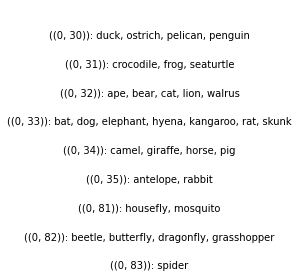

In [29]:
map_width = 100  
cell_height = 0.5  # Height of each cell in inches, for visualization
cell_width = 2  # Width of each cell in inches, for visualization
fig_height = len(neuron_to_animals) * cell_height  
fig_width = cell_width  

# Create the figure with dynamic size
fig, ax = plt.subplots(figsize=(fig_width, fig_height))

# Ensure the plot is spaced out based on the number of neurons with animals
ax.set_xlim([0, 1])
ax.set_ylim([0, len(neuron_to_animals)])

# Sort the neuron positions for a more orderly visualization
sorted_neurons = sorted(neuron_to_animals.keys(), key=lambda x: (x[0], x[1]))

# Plot each neuron's animals
for index, neuron in enumerate(sorted_neurons):
    animals = ', '.join(neuron_to_animals[neuron])
    # Invert y axis, so the plot starts from the top down
    ax.text(0.5, len(sorted_neurons) - index - 1, f"({neuron}): {animals}", ha='center', va='center')

# Hide the axes, as they don't add value in this visualization
ax.axis('off')

plt.subplots_adjust(left=0.2, right=0.8, top=0.9, bottom=0.1)
plt.show()

## 5- Cyclic Tour

In [30]:
dataset = np.array([
    [0.4, 0.4439],
    [0.2439, 0.1463],
    [0.1707, 0.2293],
    [0.2293, 0.761],
    [0.5171, 0.9414],
    [0.8732, 0.6536],
    [0.6878, 0.5219],
    [0.8488, 0.3609],
    [0.6683, 0.2536],
    [0.6195, 0.2634]
])

dataset.shape

(10, 2)

In [58]:
input_size = 2
map_size = (5, 5)  

som = SelfOrganizingMap(input_size, map_size)
som.train(dataset, max_iterations=40)

In [59]:
city_names = ["city 1", "city 2", "city 3", "city 4", "city 5", 
              "city 6", "city 7", "city 8", "city 9", "city 10"]

city_locations = defaultdict(list)

for city_name, vector in zip(city_names, dataset):
    # Find the BMU for the current animal vector
    bmu = som.find_bmu(vector)
    # Convert the BMU's numpy array or tuple to a hashable tuple
    bmu_tuple = tuple(bmu)
    
    city_locations[bmu_tuple].append(city_name)

city_locations

defaultdict(list,
            {(3, 2): ['city 1'],
             (4, 2): ['city 2', 'city 3'],
             (3, 3): ['city 4'],
             (2, 4): ['city 5'],
             (1, 3): ['city 6'],
             (1, 2): ['city 7'],
             (0, 1): ['city 8'],
             (3, 0): ['city 9', 'city 10']})

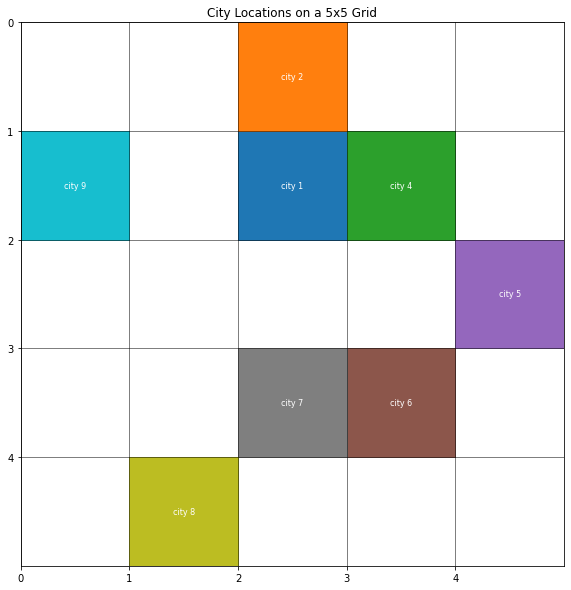

In [60]:
# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(10, 10))
size = 5
ax.imshow(np.zeros((size, size)), cmap='Greys', interpolation='nearest', extent=(0, size, 0, size), alpha=0.5)

# Assign a unique color to each city
colors = plt.cm.get_cmap('tab10', len(city_locations))

for idx, ((y, x), city) in enumerate(city_locations.items()):
    # Fill the cell with color
    ax.add_patch(Rectangle((x, size - y - 1), 1, 1, color=colors(idx)))
    # Add the city name
    ax.text(x + 0.5, size - y - 0.5, city[0], color='white', ha='center', va='center', fontsize=8)

# Customize the plot
plt.title(f'City Locations on a {size}x{size} Grid')
plt.xticks(np.arange(0, size, 1))
plt.yticks(np.arange(0, size, 1))
plt.xlim(0, size)
plt.ylim(0, size)
plt.gca().invert_yaxis()  # Adjust the y-axis to match the grid layout
plt.grid(True, which='both', color='black', linewidth=0.5)
plt.show()

## 6- Data Clustering: Votes of MPs

In [49]:
dataset = load_binary_sequence_to_matrix(file="./data/votes.dat", rows=349, cols=31)
dataset[0]

array([0. , 1. , 0. , 0.5, 0. , 0. , 1. , 0.5, 0. , 0. , 1. , 0. , 0. ,
       1. , 1. , 1. , 1. , 0. , 1. , 1. , 0. , 1. , 0. , 1. , 0.5, 0.5,
       1. , 0. , 0.5, 0. , 1. ])

In [50]:
input_size = 31
map_size = (10, 10)  

som = SelfOrganizingMap(input_size, map_size)
som.train(dataset, max_iterations=500)  

In [51]:
district = [
    1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 
    1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 
    2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 
    2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 
    4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 
    5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 
    7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 10, 10, 10, 10, 10, 
    10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 
    12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 
    14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 
    15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 
    16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 
    17, 17, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 
    19, 19, 20, 20, 20, 20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 
    21, 21, 21, 21, 21, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 23, 
    23, 23, 23, 23, 23, 23, 23, 23, 23, 24, 24, 24, 24, 24, 24, 24, 24, 
    24, 24, 24, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 26, 26, 26, 
    26, 26, 26, 26, 26, 26, 26, 27, 27, 27, 27, 27, 27, 28, 28, 28, 28, 
    28, 28, 28, 28, 28, 28, 28, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29
]


sex = [
    0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 
    1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 
    0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 
    1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 
    0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 
    1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 
    0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 
    0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 
    1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 
    1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 
    1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 
    1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 
    1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 
    1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 
    1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 
    1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1
]


parties = [
    1, 2, 1, 1, 3, 1, 4, 3, 5, 2, 6, 3, 3, 1, 4, 6, 4, 2, 3, 2, 
    3, 1, 3, 1, 3, 2, 3, 2, 5, 3, 2, 3, 0, 3, 6, 1, 6, 1, 1, 2, 
    3, 3, 3, 3, 3, 3, 1, 6, 1, 3, 3, 1, 2, 5, 4, 3, 1, 2, 2, 4, 
    7, 2, 1, 1, 5, 2, 2, 3, 1, 4, 7, 3, 1, 3, 3, 6, 5, 3, 2, 2, 
    1, 3, 3, 3, 3, 6, 3, 5, 4, 2, 7, 1, 3, 4, 3, 3, 5, 6, 7, 1, 
    3, 6, 1, 2, 3, 3, 3, 2, 1, 6, 6, 3, 3, 4, 3, 7, 3, 6, 3, 1, 
    2, 1, 7, 3, 3, 3, 6, 2, 7, 6, 3, 1, 4, 3, 3, 3, 2, 3, 3, 3, 
    3, 1, 6, 2, 3, 3, 3, 3, 3, 4, 3, 1, 2, 1, 3, 6, 1, 3, 3, 4, 
    3, 2, 2, 1, 3, 3, 3, 3, 2, 4, 3, 1, 1, 6, 1, 2, 5, 7, 1, 6, 
    3, 4, 3, 2, 3, 7, 1, 3, 3, 3, 3, 3, 3, 2, 4, 6, 2, 1, 7, 1, 
    3, 2, 4, 3, 2, 3, 1, 1, 4, 6, 1, 5, 6, 3, 3, 3, 2, 2, 3, 4, 
    1, 1, 3, 6, 7, 3, 2, 5, 2, 3, 3, 3, 5, 3, 1, 6, 3, 4, 2, 3, 
    7, 3, 3, 3, 2, 6, 1, 7, 3, 7, 6, 4, 3, 3, 3, 2, 1, 3, 3, 4, 
    3, 7, 2, 6, 1, 5, 3, 3, 3, 3, 3, 1, 4, 5, 2, 7, 3, 6, 3, 3, 
    3, 2, 1, 3, 3, 3, 7, 4, 6, 3, 3, 1, 2, 7, 5, 3, 3, 4, 6, 3, 
    3, 1, 3, 4, 7, 3, 3, 6, 5, 3, 2, 3, 3, 3, 3, 3, 7, 4, 6, 2, 
    1, 3, 3, 3, 1, 4, 7, 3, 3, 3, 4, 2, 3, 6, 1, 5, 3, 7, 3, 3, 
    3, 4, 5, 6, 3, 3, 3, 1, 2
]

In [52]:
mp_district = defaultdict(list)

for city_name, vector in zip(district, dataset):
    # Find the BMU for the current animal vector
    bmu = som.find_bmu(vector)
    # Convert the BMU's numpy array or tuple to a hashable tuple
    bmu_tuple = tuple(bmu)
    
    mp_district[bmu_tuple].append(city_name)

mp_district

defaultdict(list,
            {(9, 0): [1,
              1,
              1,
              1,
              2,
              2,
              2,
              3,
              3,
              4,
              5,
              7,
              8,
              12,
              12,
              13,
              13,
              14,
              14,
              15,
              16,
              16,
              16,
              16,
              17,
              18,
              20,
              21,
              22,
              23,
              24,
              27,
              28],
             (3, 6): [1,
              1,
              1,
              2,
              2,
              2,
              3,
              6,
              7,
              10,
              11,
              12,
              13,
              14,
              14,
              15,
              17,
              21,
              23,
              23,
              26,
              2

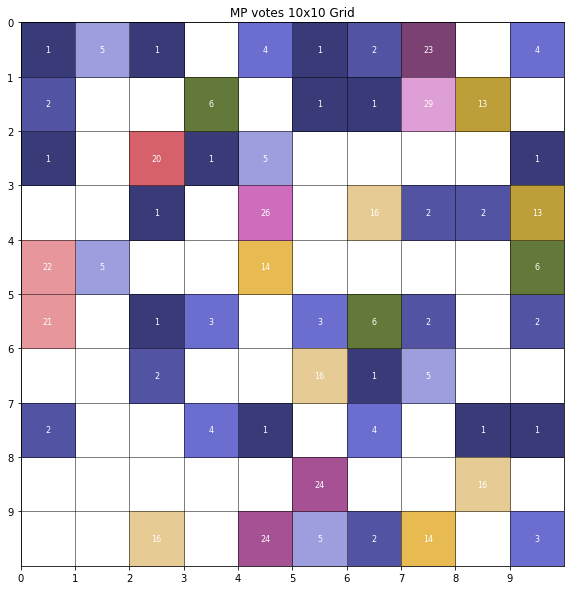

In [53]:
# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(10, 10))
size = 10
ax.imshow(np.zeros((size, size)), cmap='Greys', interpolation='nearest', extent=(0, size, 0, size), alpha=0.5)


# Assign a unique color to each of the 29 districts
colors = plt.cm.get_cmap('tab20b', 29) # Changed to 'tab20b' for more colors, adjust as needed


for idx, ((y, x), mp) in enumerate(mp_district.items()):
    # Use Counter to count occurrences of each number
    number_counts = Counter(mp)

    # Get the most common number and its count
    winner, count = number_counts.most_common(1)[0]
    # Fill the cell with color
    ax.add_patch(Rectangle((x, size - y - 1), 1, 1, color=colors(winner)))
    # Add the mp name
    ax.text(x + 0.5, size - y - 0.5, winner, color='white', ha='center', va='center', fontsize=8)

# Customize the plot
plt.title(f'MP votes {size}x{size} Grid')
plt.xticks(np.arange(0, size, 1))
plt.yticks(np.arange(0, size, 1))
plt.xlim(0, size)
plt.ylim(0, size)
plt.gca().invert_yaxis()  # Adjust the y-axis to match the grid layout
plt.grid(True, which='both', color='black', linewidth=0.5)
plt.show()

In [54]:
mp_sex = defaultdict(list)

for s, vector in zip(sex, dataset):
    # Find the BMU for the current animal vector
    bmu = som.find_bmu(vector)
    # Convert the BMU's numpy array or tuple to a hashable tuple
    bmu_tuple = tuple(bmu)
    
    mp_sex[bmu_tuple].append(s)

mp_sex

defaultdict(list,
            {(9, 0): [0,
              0,
              1,
              1,
              0,
              0,
              1,
              0,
              0,
              0,
              1,
              0,
              0,
              0,
              1,
              0,
              1,
              1,
              1,
              1,
              1,
              0,
              1,
              1,
              0,
              1,
              0,
              1,
              0,
              0,
              0],
             (3, 6): [0,
              0,
              1,
              0,
              0,
              1,
              0,
              1,
              0,
              0,
              1,
              0,
              0,
              1,
              0,
              0,
              1,
              0,
              0,
              1,
              0,
              1],
             (9, 2): [0, 1, 0],
             (9, 6): [1,
      

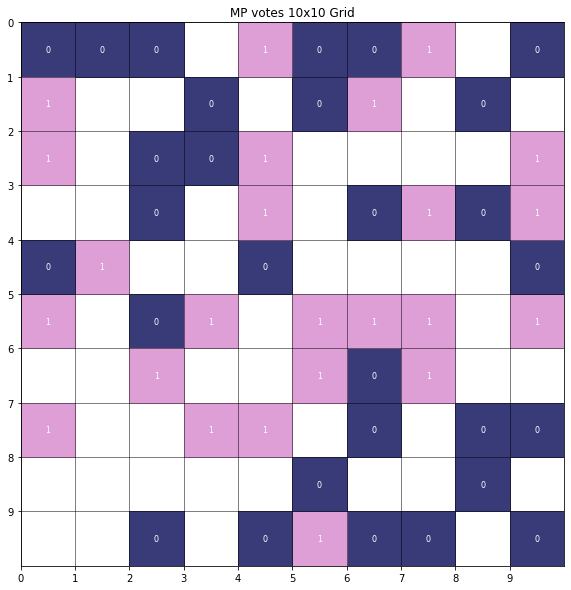

In [55]:
# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(10, 10))
size = 10
ax.imshow(np.zeros((size, size)), cmap='Greys', interpolation='nearest', extent=(0, size, 0, size), alpha=0.5)


# Assign a unique color to each of the 29 districts
colors = plt.cm.get_cmap('tab20b', 2) # Changed to 'tab20b' for more colors, adjust as needed


for idx, ((y, x), mp) in enumerate(mp_sex.items()):
    # Use Counter to count occurrences of each number
    number_counts = Counter(mp)

    # Get the most common number and its count
    winner, count = number_counts.most_common(1)[0]
    # Fill the cell with color
    ax.add_patch(Rectangle((x, size - y - 1), 1, 1, color=colors(winner)))
    # Add the mp name
    ax.text(x + 0.5, size - y - 0.5, winner, color='white', ha='center', va='center', fontsize=8)

# Customize the plot
plt.title(f'MP votes {size}x{size} Grid')
plt.xticks(np.arange(0, size, 1))
plt.yticks(np.arange(0, size, 1))
plt.xlim(0, size)
plt.ylim(0, size)
plt.gca().invert_yaxis()  # Adjust the y-axis to match the grid layout
plt.grid(True, which='both', color='black', linewidth=0.5)
plt.show()

In [56]:
mp_parties = defaultdict(list)

for s, vector in zip(parties, dataset):
    # Find the BMU for the current animal vector
    bmu = som.find_bmu(vector)
    # Convert the BMU's numpy array or tuple to a hashable tuple
    bmu_tuple = tuple(bmu)
    
    mp_parties[bmu_tuple].append(s)

mp_parties

defaultdict(list,
            {(9, 0): [1,
              1,
              1,
              1,
              1,
              1,
              1,
              1,
              1,
              1,
              1,
              1,
              1,
              1,
              1,
              1,
              1,
              1,
              1,
              1,
              1,
              1,
              1,
              1,
              1,
              1,
              1,
              1,
              1,
              1,
              1,
              1,
              1],
             (3, 6): [2,
              2,
              2,
              2,
              2,
              2,
              2,
              2,
              2,
              2,
              2,
              2,
              2,
              2,
              2,
              2,
              2,
              2,
              2,
              2,
              2,
              2,
              2],
            

In [47]:
party_dict = {
    0: 'no party',
    1: 'm',
    2: 'fp',
    3: 's',
    4: 'v',
    5: 'mp',
    6: 'kd',
    7: 'c'
}

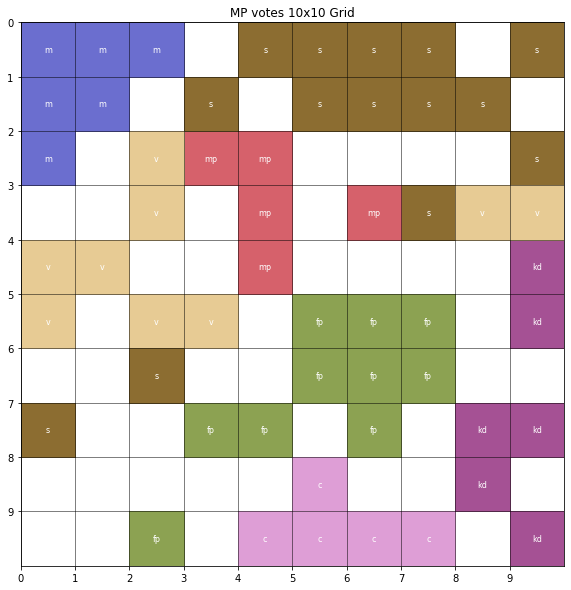

In [57]:
# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(10, 10))
size = 10
ax.imshow(np.zeros((size, size)), cmap='Greys', interpolation='nearest', extent=(0, size, 0, size), alpha=0.5)


# Assign a unique color to each of the 29 districts
colors = plt.cm.get_cmap('tab20b', 8) # Changed to 'tab20b' for more colors, adjust as needed


for idx, ((y, x), mp) in enumerate(mp_parties.items()):
    # Use Counter to count occurrences of each number
    number_counts = Counter(mp)

    # Get the most common number and its count
    winner, count = number_counts.most_common(1)[0]
    # Fill the cell with color
    ax.add_patch(Rectangle((x, size - y - 1), 1, 1, color=colors(winner)))
    # Add the mp name
    ax.text(x + 0.5, size - y - 0.5, party_dict[winner], color='white', ha='center', va='center', fontsize=8)

# Customize the plot
plt.title(f'MP votes {size}x{size} Grid')
plt.xticks(np.arange(0, size, 1))
plt.yticks(np.arange(0, size, 1))
plt.xlim(0, size)
plt.ylim(0, size)
plt.gca().invert_yaxis()  # Adjust the y-axis to match the grid layout
plt.grid(True, which='both', color='black', linewidth=0.5)
plt.show()